**Problem - 1**

Tasks:
1. Fit a simple linear regression model using the number of TV ads as the independent
variable and the number of cars sold as the dependent variable.
 What is the equation of the linear model?
2. Interpret the coefficients of the model:
 What does the slope tell you about the change in car sales for each additional TV
ad?
 What does the intercept represent in this context?
3. Make a prediction using your model:
 Predict the number of cars sold when 10 TV ads are aired.
4. Apply SHAP (SHapley Additive exPlanations) to your linear regression model:
 Compute the SHAP values for all instances in the dataset.
 Plot a SHAP waterfall plot for at least one prediction to show how the final
prediction is derived from the baseline.
 Plot SHAP force plot for all predictions
5. Analyze and interpret the SHAP values:
 How does the number of TV ads contribute to increasing or decreasing the
prediction for each instance?

Model Equation: y = 10.00 + 5.00 * x
Interpretation of Slope: Each additional TV ad increases car sales by approximately 5.00.
Interpretation of Intercept: When 0 TV ads are aired, predicted cars sold = 10.00.
Predicted Cars Sold for 10 TV ads: 60.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


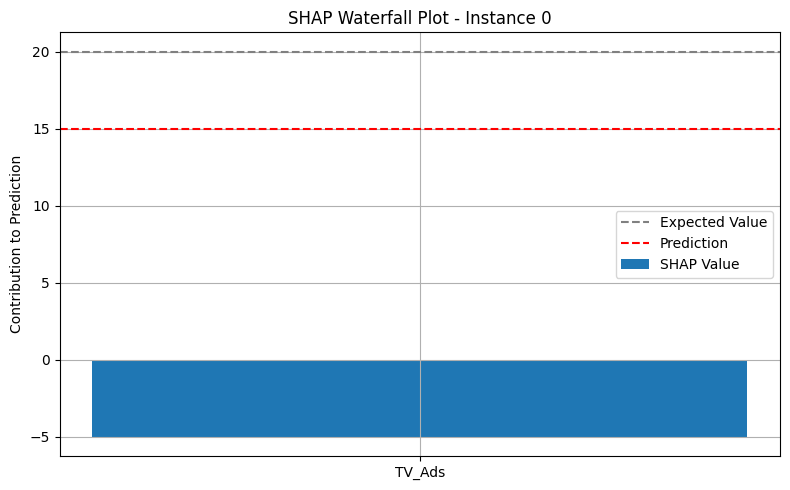

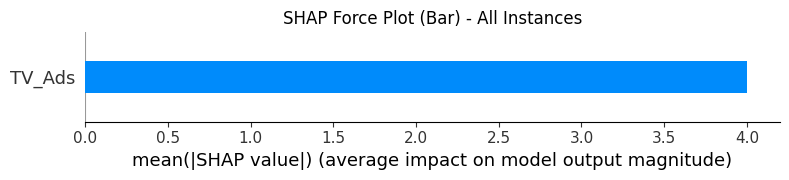

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import shap

file_path = 'Car_Sales.xlsx'
car_sales_df = pd.read_excel(file_path)

car_sales_df.columns = ['TV_Ads', 'Cars_Sold']
X = car_sales_df[['TV_Ads']]
y = car_sales_df['Cars_Sold']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]
print(f"Model Equation: y = {intercept:.2f} + {slope:.2f} * x")

print(f"Interpretation of Slope: Each additional TV ad increases car sales by approximately {slope:.2f}.")
print(f"Interpretation of Intercept: When 0 TV ads are aired, predicted cars sold = {intercept:.2f}.")

ads = 10
predicted_sales = model.predict(np.array([[ads]]))[0]
print(f"Predicted Cars Sold for {ads} TV ads: {predicted_sales:.2f}")

np.bool = bool

explainer = shap.LinearExplainer(model, X)
shap_values = explainer.shap_values(X)

instance_index = 0
expected_value = explainer.expected_value
shap_value = shap_values[instance_index]
final_prediction = expected_value + shap_value[0]

plt.figure(figsize=(8, 5))
plt.title("SHAP Waterfall Plot - Instance 0")
plt.axhline(expected_value, color='gray', linestyle='--', label='Expected Value')
plt.bar(["TV_Ads"], shap_value, label='SHAP Value')
plt.axhline(final_prediction, color='red', linestyle='--', label='Prediction')
plt.ylabel("Contribution to Prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("SHAP Force Plot (Bar) - All Instances")
plt.tight_layout()
plt.show()


# Problem - 2
Tasks:
1. Fit a multiple linear regression model using IQ and Study Hours as independent
variables and Test Score as the dependent variable.
o What is the equation of the linear model?
2. Interpret the coefficients of the model:
o What does the coefficient of IQ represent?
o What does the coefficient of Study Hours represent?
o What does the intercept mean in this context?
3. Make a prediction using your model:
o Predict the Test Score of a student with an IQ of 95 who studies for 25 hours.
4. Apply SHAP (SHapley Additive exPlanations) to your multiple linear regression
model:
o Compute the SHAP values for all 5 students.
o Plot a SHAP waterfall plot for at least one prediction to illustrate how features
contribute to the prediction.
o Plot SHAP force plot for all predictions
5. Analyze and interpret the SHAP values:
o How do IQ and Study Hours contribute to increasing or decreasing the
prediction for each student?
o For which student does Study Hours contribute more than IQ?

Model equation:
TestScore = 0.50 * IQ + 0.50 * StudyHours + 20.00

Prediction for IQ=95 and StudyHours=25: 80.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


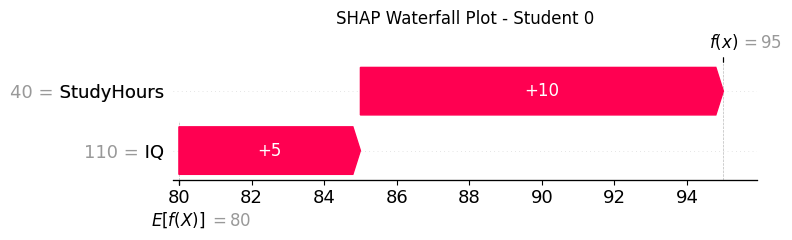

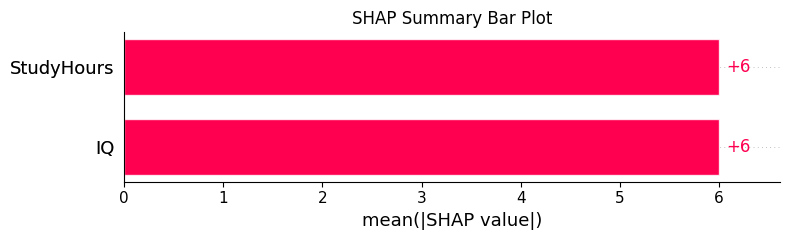


SHAP Contribution Comparison:
   Student    IQ  StudyHours  StudyHours > IQ
0        0   5.0        10.0             True
1        1  10.0         5.0            False
2        2   0.0         0.0            False
3        3  -5.0       -10.0             True
4        4 -10.0        -5.0            False


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import shap

np.bool = bool

df = pd.read_excel("StudyHour.xlsx")
df.columns = [col.strip().replace('\n', '') for col in df.columns]  # Clean column names

X = df[['IQ', 'StudyHours']]
y = df['TestScore']

model = LinearRegression()
model.fit(X, y)

print("Model equation:")
print(f"TestScore = {model.coef_[0]:.2f} * IQ + {model.coef_[1]:.2f} * StudyHours + {model.intercept_:.2f}")

prediction = model.predict([[95, 25]])[0]
print(f"\nPrediction for IQ=95 and StudyHours=25: {prediction:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0], show=False)
plt.title("SHAP Waterfall Plot - Student 0")
plt.tight_layout()
plt.show()

shap.plots.bar(shap_values, show=False)
plt.title("SHAP Summary Bar Plot")
plt.tight_layout()
plt.show()

shap_df = pd.DataFrame(shap_values.values, columns=X.columns)
shap_df['Student'] = range(len(shap_df))
shap_df['StudyHours > IQ'] = shap_df['StudyHours'].abs() > shap_df['IQ'].abs()

print("\nSHAP Contribution Comparison:")
print(shap_df[['Student', 'IQ', 'StudyHours', 'StudyHours > IQ']])


# Problem - 3
Tasks:
1. Fit a simple linear regression model using Years of Experience as the independent
variable and Salary as the dependent variable.
 What is the equation of the fitted linear model?
2. Interpret the coefficients of the model:
 What does the slope represent in this context?
 What does the intercept represent?
3. Make predictions using the model:
 Predict the Salary for someone with 3.5 years of experience.
 Predict the Salary for someone with 7 years of experience.
4. Apply SHAP (SHapley Additive exPlanations) to explain the model:
 Compute SHAP values for all 30 instances.
 Plot a SHAP waterfall plot & force plot for at least one instance.
5. Analyze and interpret the SHAP values:
 How does Years of Experience contribute to the predicted salary for different
individuals?
 Is the contribution consistent across low and high experience levels?


Model equation:
Salary = 9449.96 * YearsExperience + 25792.20

Predicted Salary for 3.5 years of experience: $58867.07
Predicted Salary for 7 years of experience: $91941.94


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


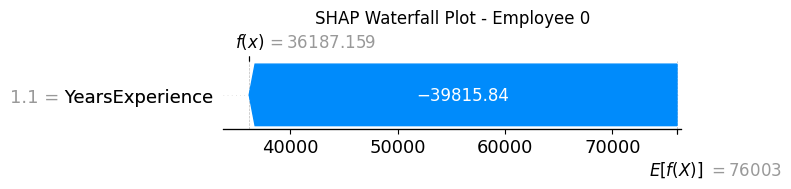

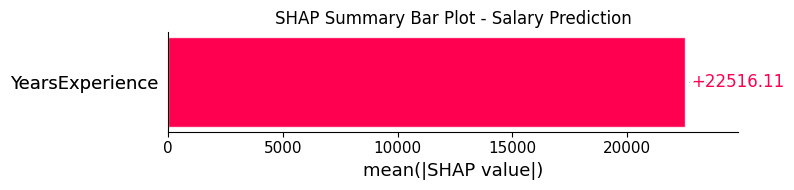


SHAP Values and Contribution by Experience:
   YearsExperience  SHAP_Contribution
0              1.1       10394.958554
1              1.3       12284.951018
2              1.5       14174.943482
3              2.0       18899.924643
4              2.2       20789.917107


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import shap

np.bool = bool

df = pd.read_csv("Experience_Salary.csv")

X = df[['YearsExperience']]
y = df['Salary']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
print(f"Model equation:\nSalary = {slope:.2f} * YearsExperience + {intercept:.2f}")

pred_3_5 = model.predict([[3.5]])[0]
pred_7 = model.predict([[7]])[0]
print(f"\nPredicted Salary for 3.5 years of experience: ${pred_3_5:.2f}")
print(f"Predicted Salary for 7 years of experience: ${pred_7:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0], show=False)
plt.title("SHAP Waterfall Plot - Employee 0")
plt.tight_layout()
plt.show()

shap.plots.bar(shap_values, show=False)
plt.title("SHAP Summary Bar Plot - Salary Prediction")
plt.tight_layout()
plt.show()

shap_df = pd.DataFrame(shap_values.values, columns=X.columns)
shap_df['YearsExperience'] = X['YearsExperience']
shap_df['SHAP_Contribution'] = shap_df['YearsExperience'] * slope
print("\nSHAP Values and Contribution by Experience:")
print(shap_df[['YearsExperience', 'SHAP_Contribution']].head())


# Problem - 4
Tasks
1. Fit a multiple linear regression model using Intelligence and Extroversion as
independent variables, and Sales as the dependent variable.
o What is the equation of the linear regression model?
2. Interpret the model coefficients:
o What does the coefficient for Intelligence indicate?
o What does the coefficient for Extroversion indicate?
o What does the intercept represent in this context?
3. Make predictions using the model:
o Predict the weekly sales for a person with Intelligence = 100 and Extroversion =
25.
o Predict for Intelligence = 120 and Extroversion = 18.
4. Apply SHAP (SHapley Additive exPlanations) to the regression model:
o Calculate SHAP values for all salespersons in the dataset.
o Plot a SHAP waterfall plot & force plot for at least one prediction.
o Optionally, generate a summary plot showing the impact of both features.
5. Analyze and interpret SHAP values:
o How do Intelligence and Extroversion contribute to increasing or decreasing
the sales prediction?
o Which feature generally contributes more to the prediction?

Model Equation:
Sales = 8.22 * Intelligence + 49.71 * Extroversion + 993.92

Prediction for Intelligence=100 & Extroversion=25: $3058.63
Prediction for Intelligence=120 & Extroversion=18: $2875.07


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


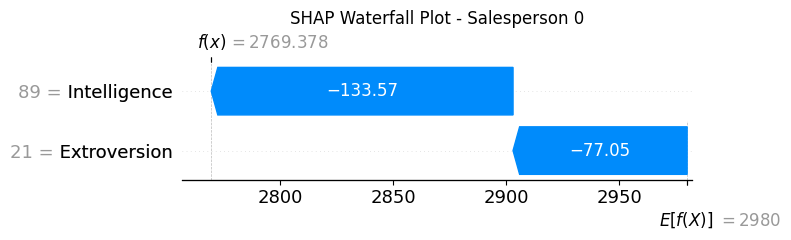

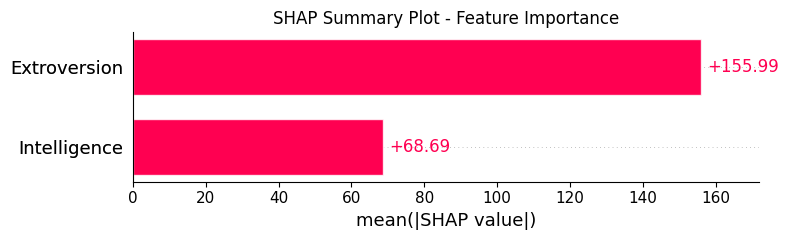


SHAP Values for Feature Contributions:
   Intelligence  Extroversion  Total_SHAP_Contribution
0   -133.573569    -77.048384              -210.621952
1   -100.693921     72.077520               -28.616401
2   -117.133745    -77.048384              -194.182128
3    137.683524     22.368886               160.052410
4     80.144141    221.203424               301.347565


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import shap

# Fix deprecated np.bool for SHAP compatibility
np.bool = bool

# 1. Load and clean dataset
df = pd.read_excel("Int_Ext.xlsx")
df = df[['Int', 'Ext', 'sal']].dropna().rename(columns={
    'Int': 'Intelligence',
    'Ext': 'Extroversion',
    'sal': 'Sales'
})

X = df[['Intelligence', 'Extroversion']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)

coef_int = model.coef_[0]
coef_ext = model.coef_[1]
intercept = model.intercept_
print(f"Model Equation:\nSales = {coef_int:.2f} * Intelligence + {coef_ext:.2f} * Extroversion + {intercept:.2f}")

pred_1 = model.predict([[100, 25]])[0]
pred_2 = model.predict([[120, 18]])[0]
print(f"\nPrediction for Intelligence=100 & Extroversion=25: ${pred_1:.2f}")
print(f"Prediction for Intelligence=120 & Extroversion=18: ${pred_2:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0], show=False)
plt.title("SHAP Waterfall Plot - Salesperson 0")
plt.tight_layout()
plt.show()

shap.plots.bar(shap_values, show=False)
plt.title("SHAP Summary Plot - Feature Importance")
plt.tight_layout()
plt.show()

shap_df = pd.DataFrame(shap_values.values, columns=X.columns)
shap_df['Total_SHAP_Contribution'] = shap_df.sum(axis=1)
print("\nSHAP Values for Feature Contributions:")
print(shap_df.head())


# Problem - 5
Tasks:
1. Fit a multiple linear regression model using Facebook and Newspaper as independent
variables, and Sales as the dependent variable.
o What is the equation of the linear regression model?
2. Interpret the model coefficients:
o What does the coefficient for Facebook indicate?
o What does the coefficient for Newspaper indicate?
o What does the intercept represent in this context?
3. Make predictions using the model:
o Predict the weekly sales for a company that spends Facebook = 50 and
Newspaper = 70.
o Predict the weekly sales for Facebook = 25 and Newspaper = 30.
4. Apply SHAP (SHapley Additive exPlanations) to the regression model:
o Compute SHAP values for each data point in the dataset.
o Generate a SHAP waterfall plot and a force plot for at least one prediction.
o Optionally, create a SHAP summary plot to visualize feature importance across
the dataset.
5. Analyze and interpret SHAP values:
o How do Facebook and Newspaper ads contribute to increasing or decreasing the
predicted sales?
o Which advertising channel generally has a stronger influence on the
predictions?


Model Equation:
Sales = 0.1992 * Facebook + 0.0069 * Newspaper + 10.9957

Predicted Sales for Facebook=50 & Newspaper=70: 21.44 (in thousands)
Predicted Sales for Facebook=25 & Newspaper=30: 16.18 (in thousands)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


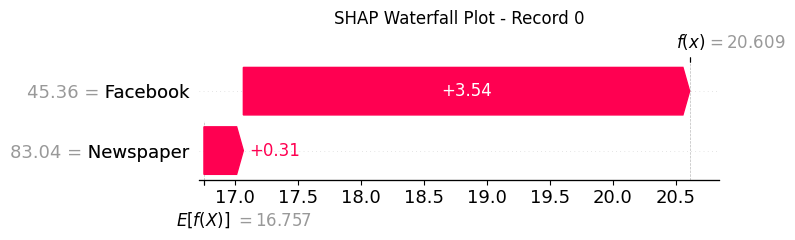

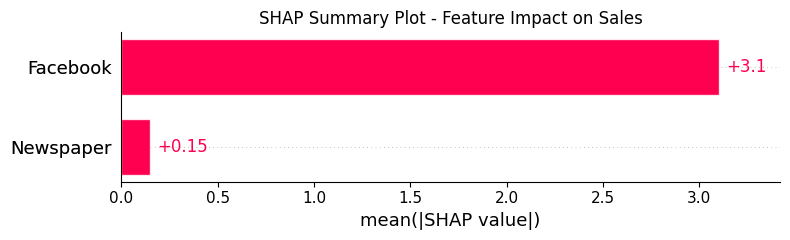


SHAP Values (first 5 rows):
   Facebook  Newspaper  Total_SHAP_Contribution
0  3.538993   0.312389                 3.851382
1  3.897626   0.111916                 4.009542
2  5.475612   0.313221                 5.788833
3  4.375804   0.223382                 4.599186
4 -2.916406   0.222550                -2.693855


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import shap

np.bool = bool

df = pd.read_excel("Marketing_Dataset.xlsx")
df = df[['facebook', 'newspaper', 'sales']].copy()
df.columns = ['Facebook', 'Newspaper', 'Sales']

X = df[['Facebook', 'Newspaper']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)

coef_fb = model.coef_[0]
coef_np = model.coef_[1]
intercept = model.intercept_
print(f"Model Equation:\nSales = {coef_fb:.4f} * Facebook + {coef_np:.4f} * Newspaper + {intercept:.4f}")

pred1 = model.predict([[50, 70]])[0]
pred2 = model.predict([[25, 30]])[0]
print(f"\nPredicted Sales for Facebook=50 & Newspaper=70: {pred1:.2f} (in thousands)")
print(f"Predicted Sales for Facebook=25 & Newspaper=30: {pred2:.2f} (in thousands)")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0], show=False)
plt.title("SHAP Waterfall Plot - Record 0")
plt.tight_layout()
plt.show()

shap.plots.bar(shap_values, show=False)
plt.title("SHAP Summary Plot - Feature Impact on Sales")
plt.tight_layout()
plt.show()

shap_df = pd.DataFrame(shap_values.values, columns=X.columns)
shap_df['Total_SHAP_Contribution'] = shap_df.sum(axis=1)
print("\nSHAP Values (first 5 rows):")
print(shap_df.head())
